# Correlation v.s. EBV plots

In [1]:
import numpy as np
from scipy.stats import norm, multivariate_normal
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [2]:
mu = 28
threshold = 28.1
sigma = np.linspace(0.01, 2, 6)
tau = np.linspace(0.01, 1, 8)    # sqrt of nugget
rho = np.linspace(0, 1, 15)    # correlation coefficient

eibv_appr = np.zeros([len(rho), len(sigma), len(tau)])
eibv_analy = np.zeros_like(eibv_appr)


In [3]:
for i in range(len(rho)):
    for j in range(len(sigma)):
        for k in range(len(tau)):
            rho_tmp = rho[i]
            sigma_tmp = sigma[j]
            tau_tmp = tau[k]
            cov = rho_tmp * sigma_tmp ** 2
            variance_reduction = cov / (sigma_tmp**2 + tau_tmp**2) * cov
            sigma_post = sigma_tmp**2 - variance_reduction
            # sigma_psqrt = np.sqrt(sigma_post)

            def calc_eibv_approx(threshold, mu, sigma) -> float:
                """ Calculate EIBV based on the numerical approximation.
                """
                ep = norm.cdf(threshold, mu, sigma)  # excursion probability
                ibv = ep * (1 - ep)
                return ibv

            def calc_eibv_analy(threshold, mu, sigma_post, variance_reduction) -> float:
                """ Calculate EIBV based on the analytical solution. """
                eibv = multivariate_normal.cdf(np.array([threshold, -threshold]), np.array([mu, -mu]),
                                                np.array([[sigma_post + variance_reduction, -variance_reduction],
                                                          [-variance_reduction, sigma_post + variance_reduction]]))
                return eibv

            eibv_appr[i][j][k] = calc_eibv_approx(threshold, mu, sigma_post)
            eibv_analy[i][j][k] = calc_eibv_analy(threshold, mu, sigma_post, variance_reduction)

# filepath = "/Users/yaolin/Downloads/fig/"
# np.save(filepath + "eibv_appr.npy", eibv_appr)
# np.save(filepath + "eibv_analy.npy", eibv_analy)
# eibv_appr = np.load(filepath + "eibv_appr.npy")
# eibv_analy = np.load(filepath + "eibv_analy.npy")


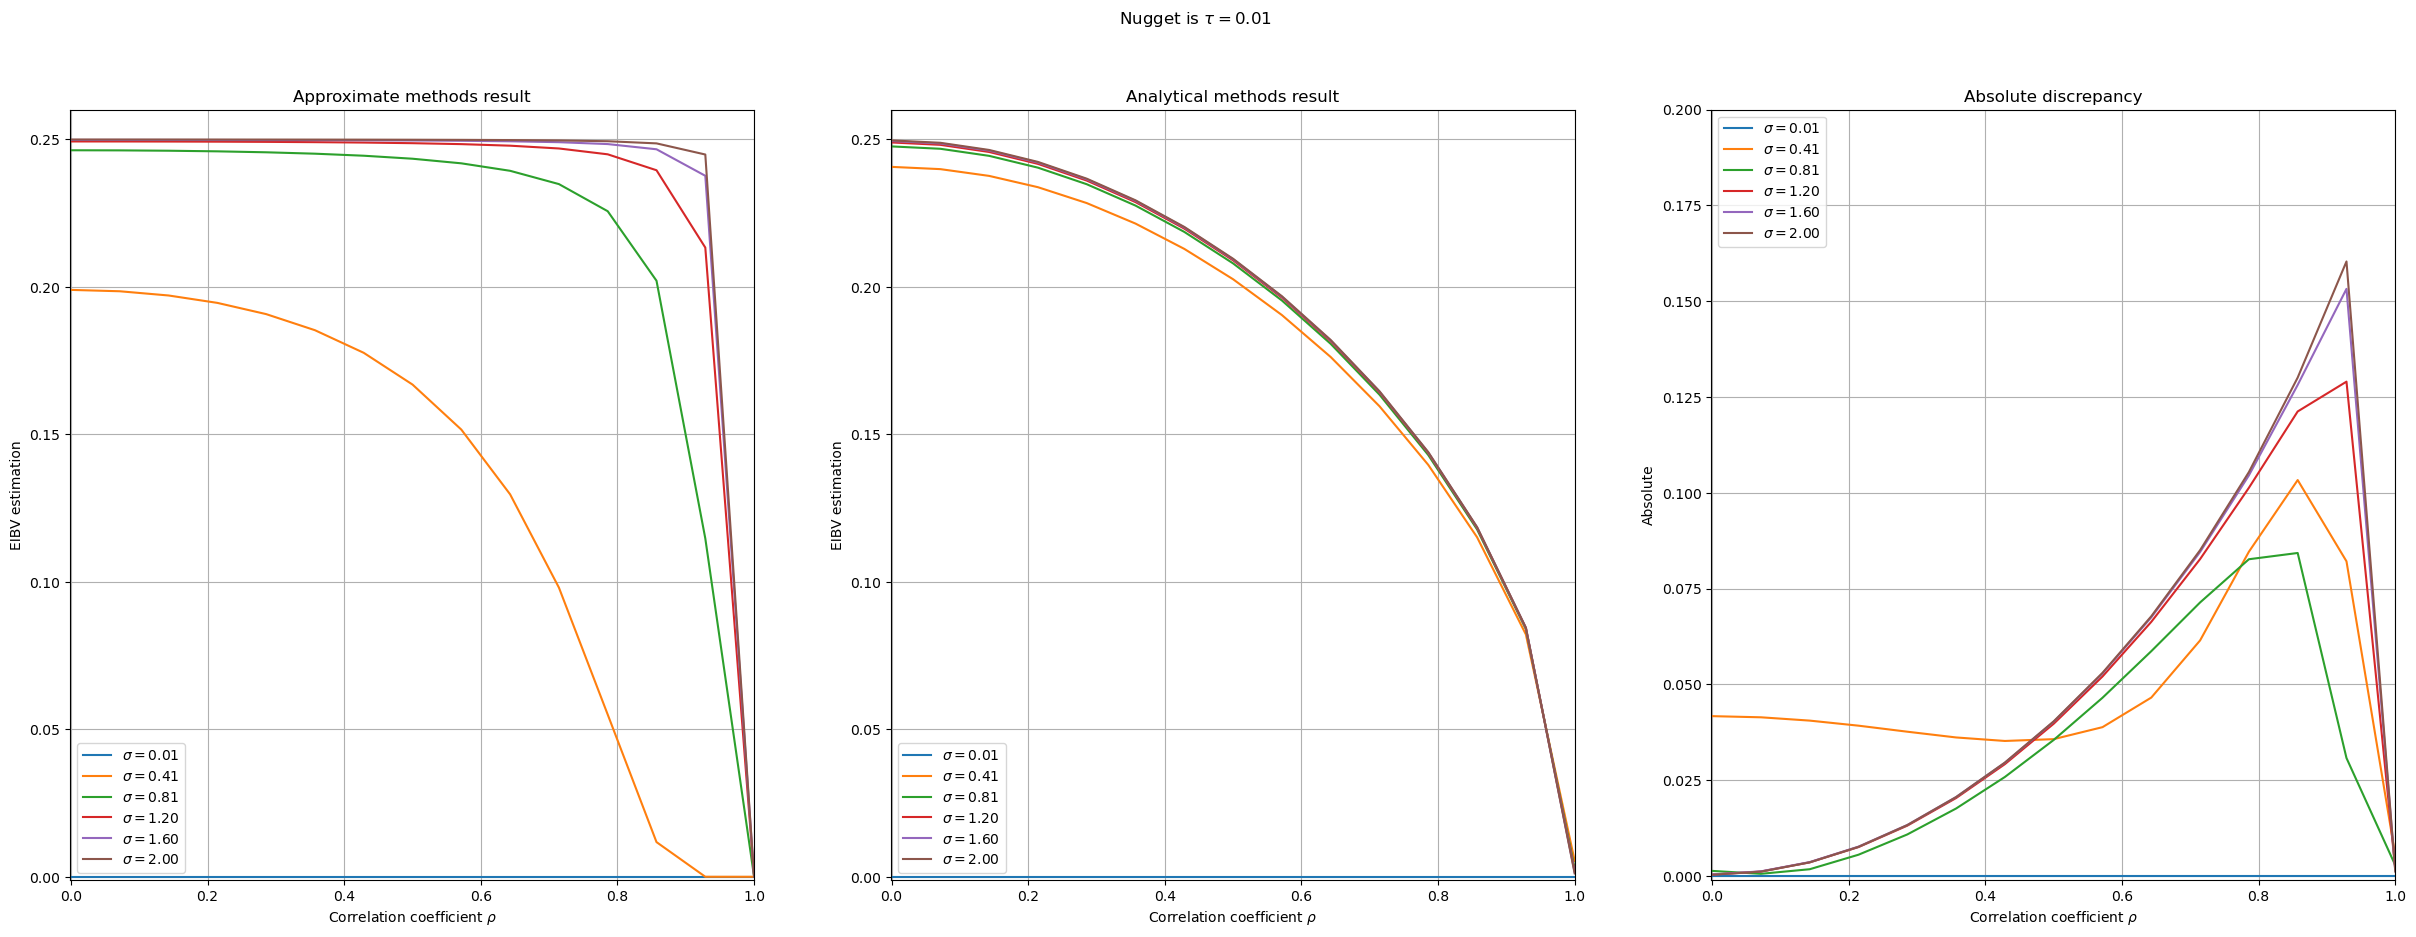

Success!


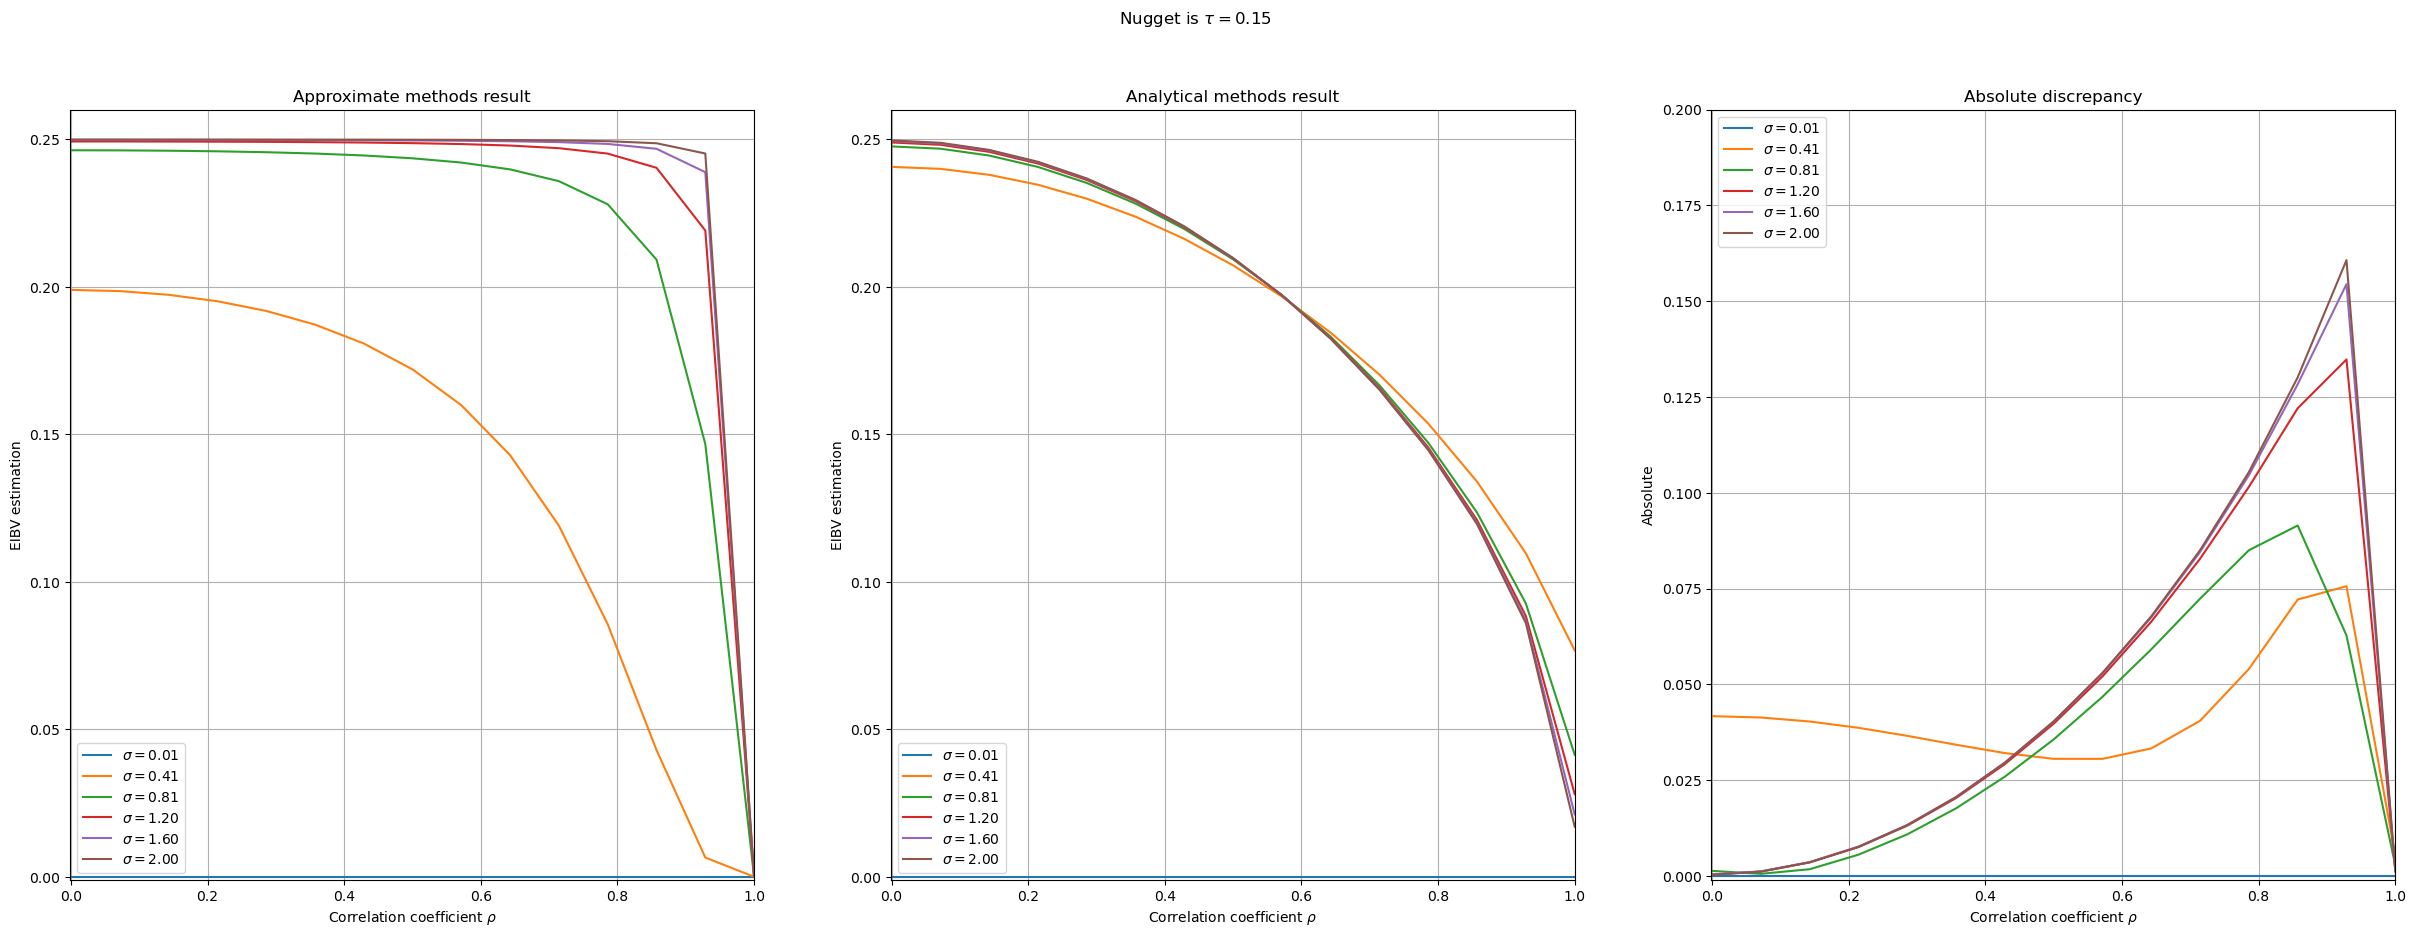

Success!


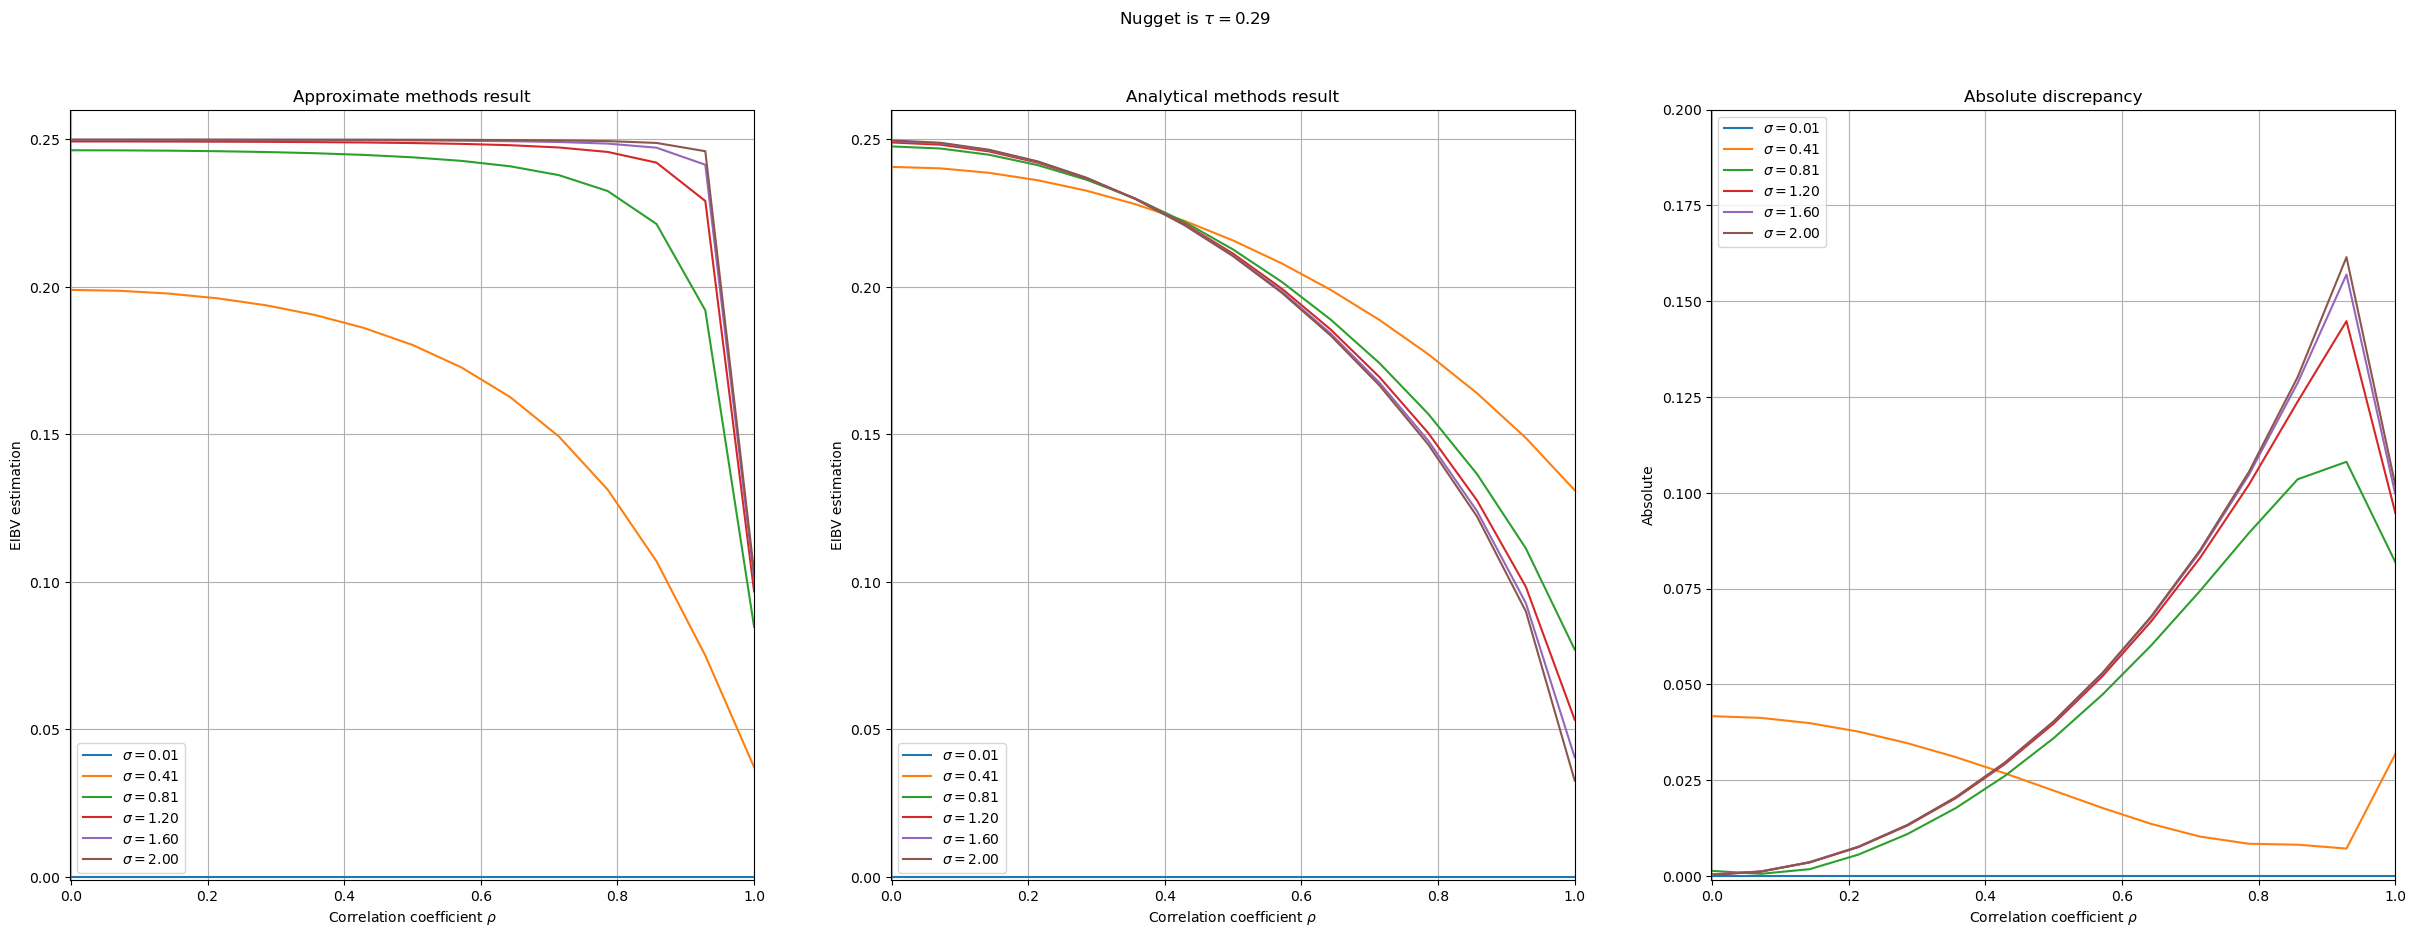

Success!


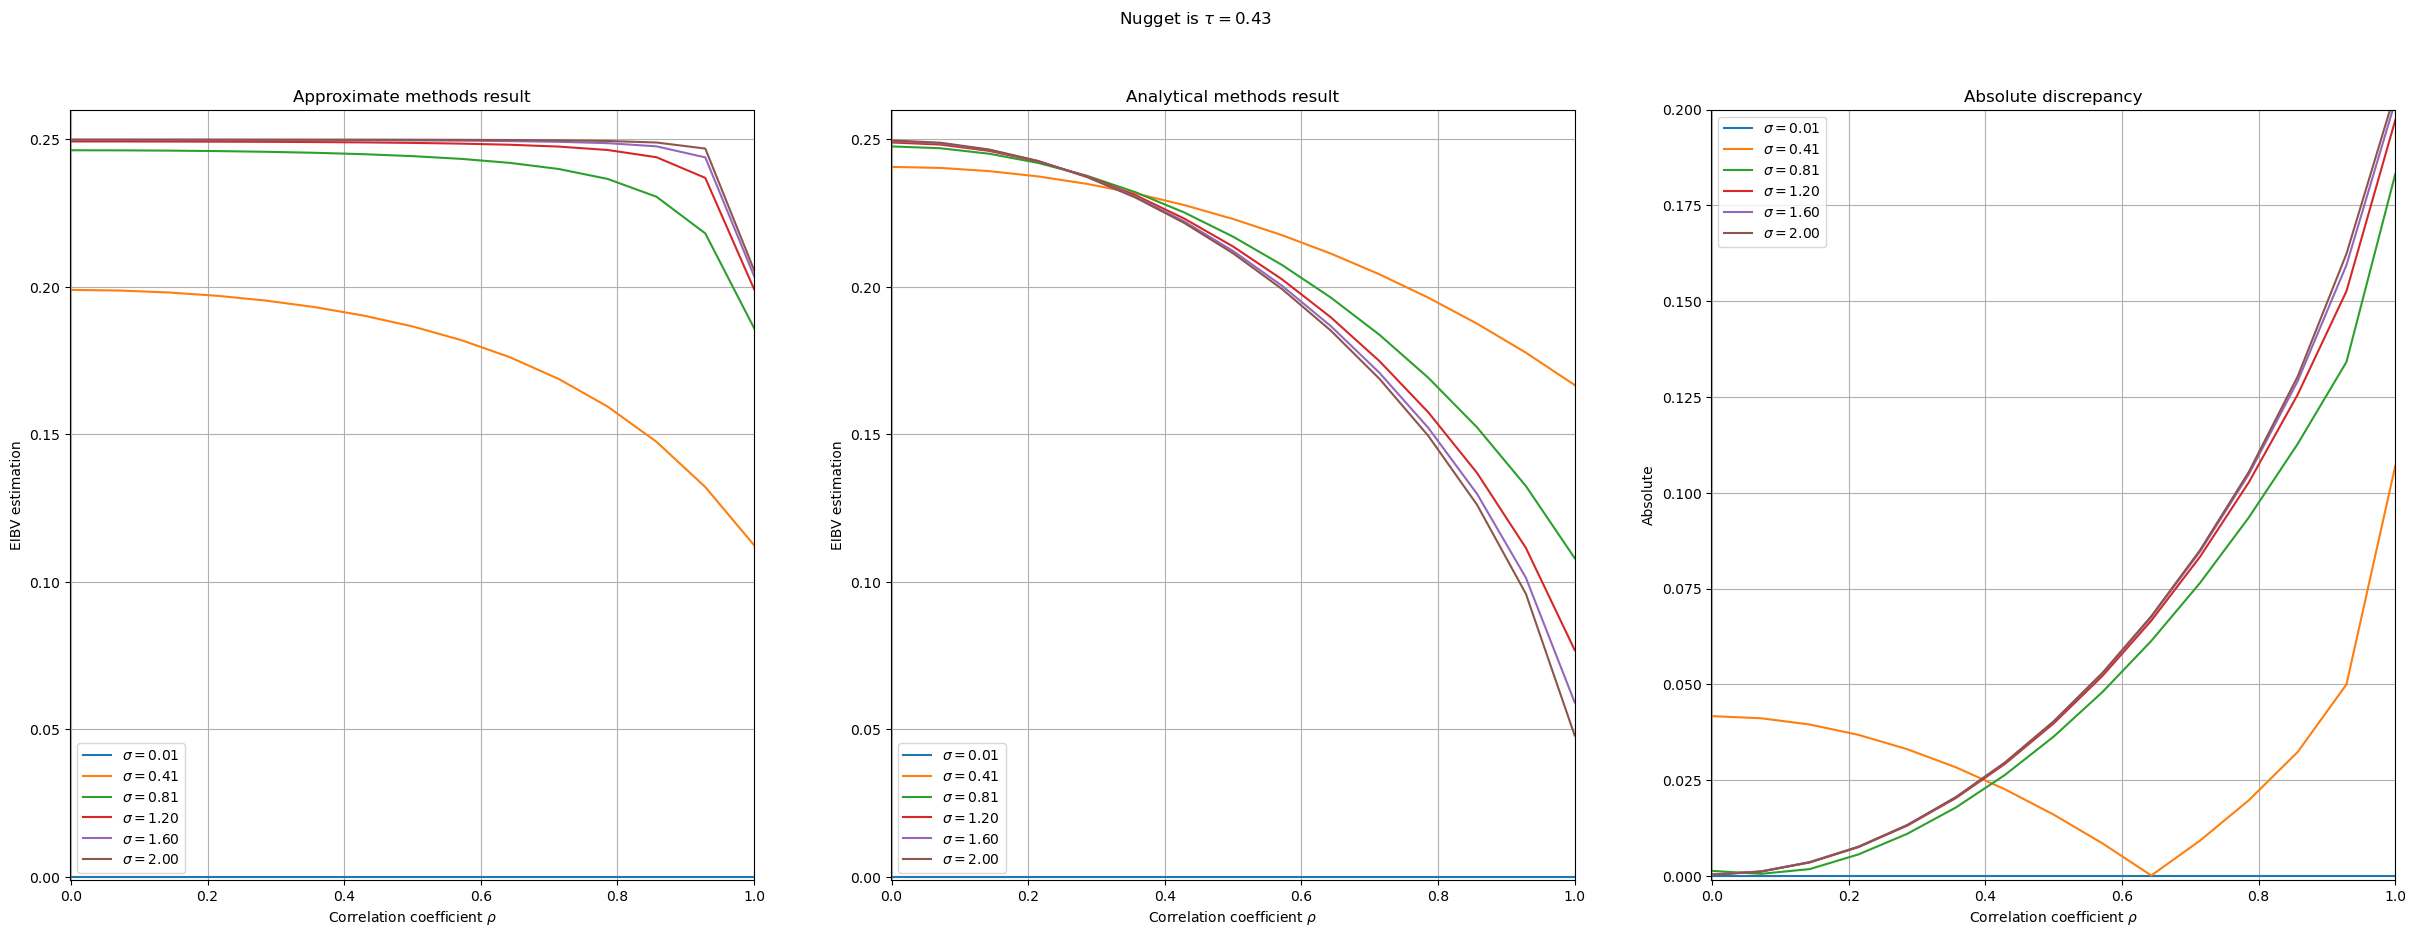

Success!


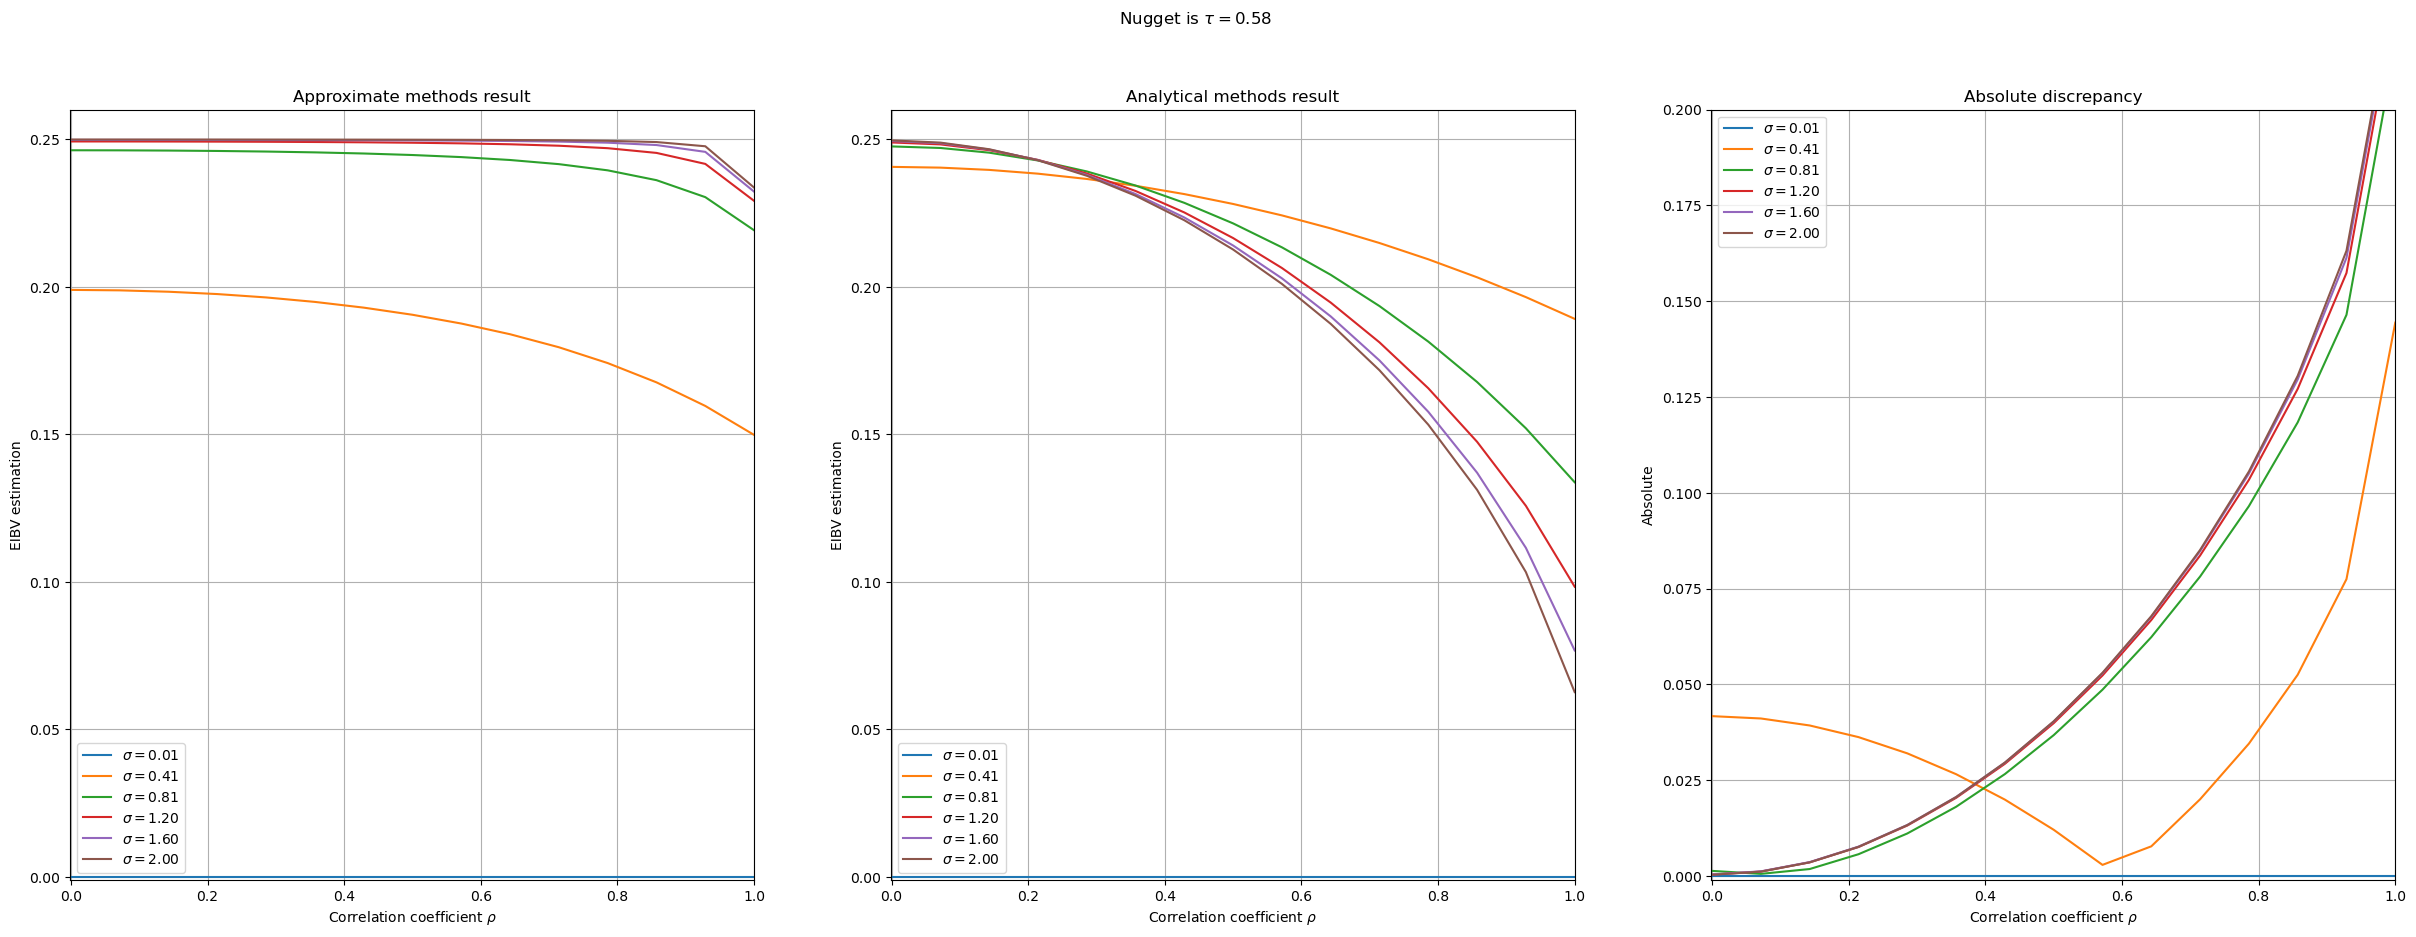

Success!


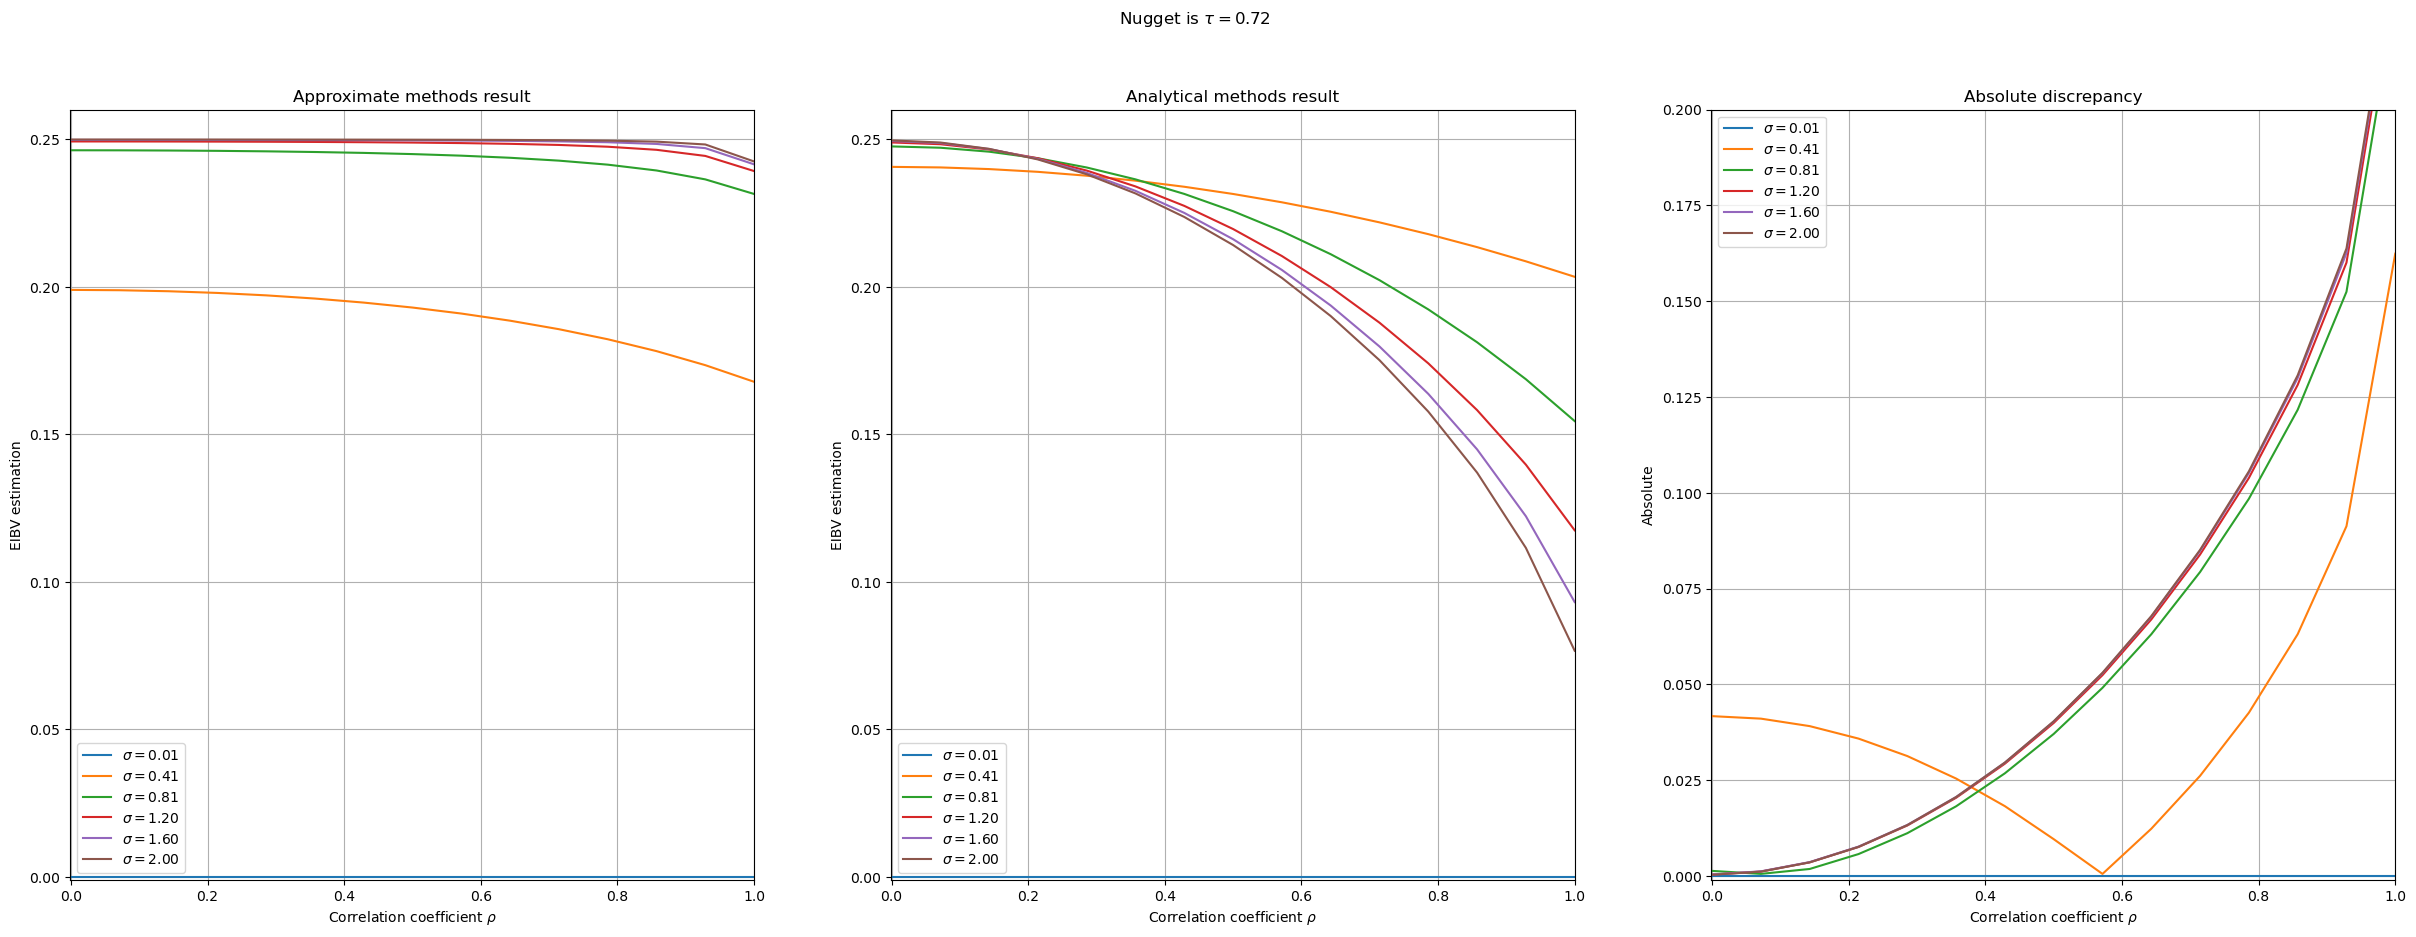

Success!


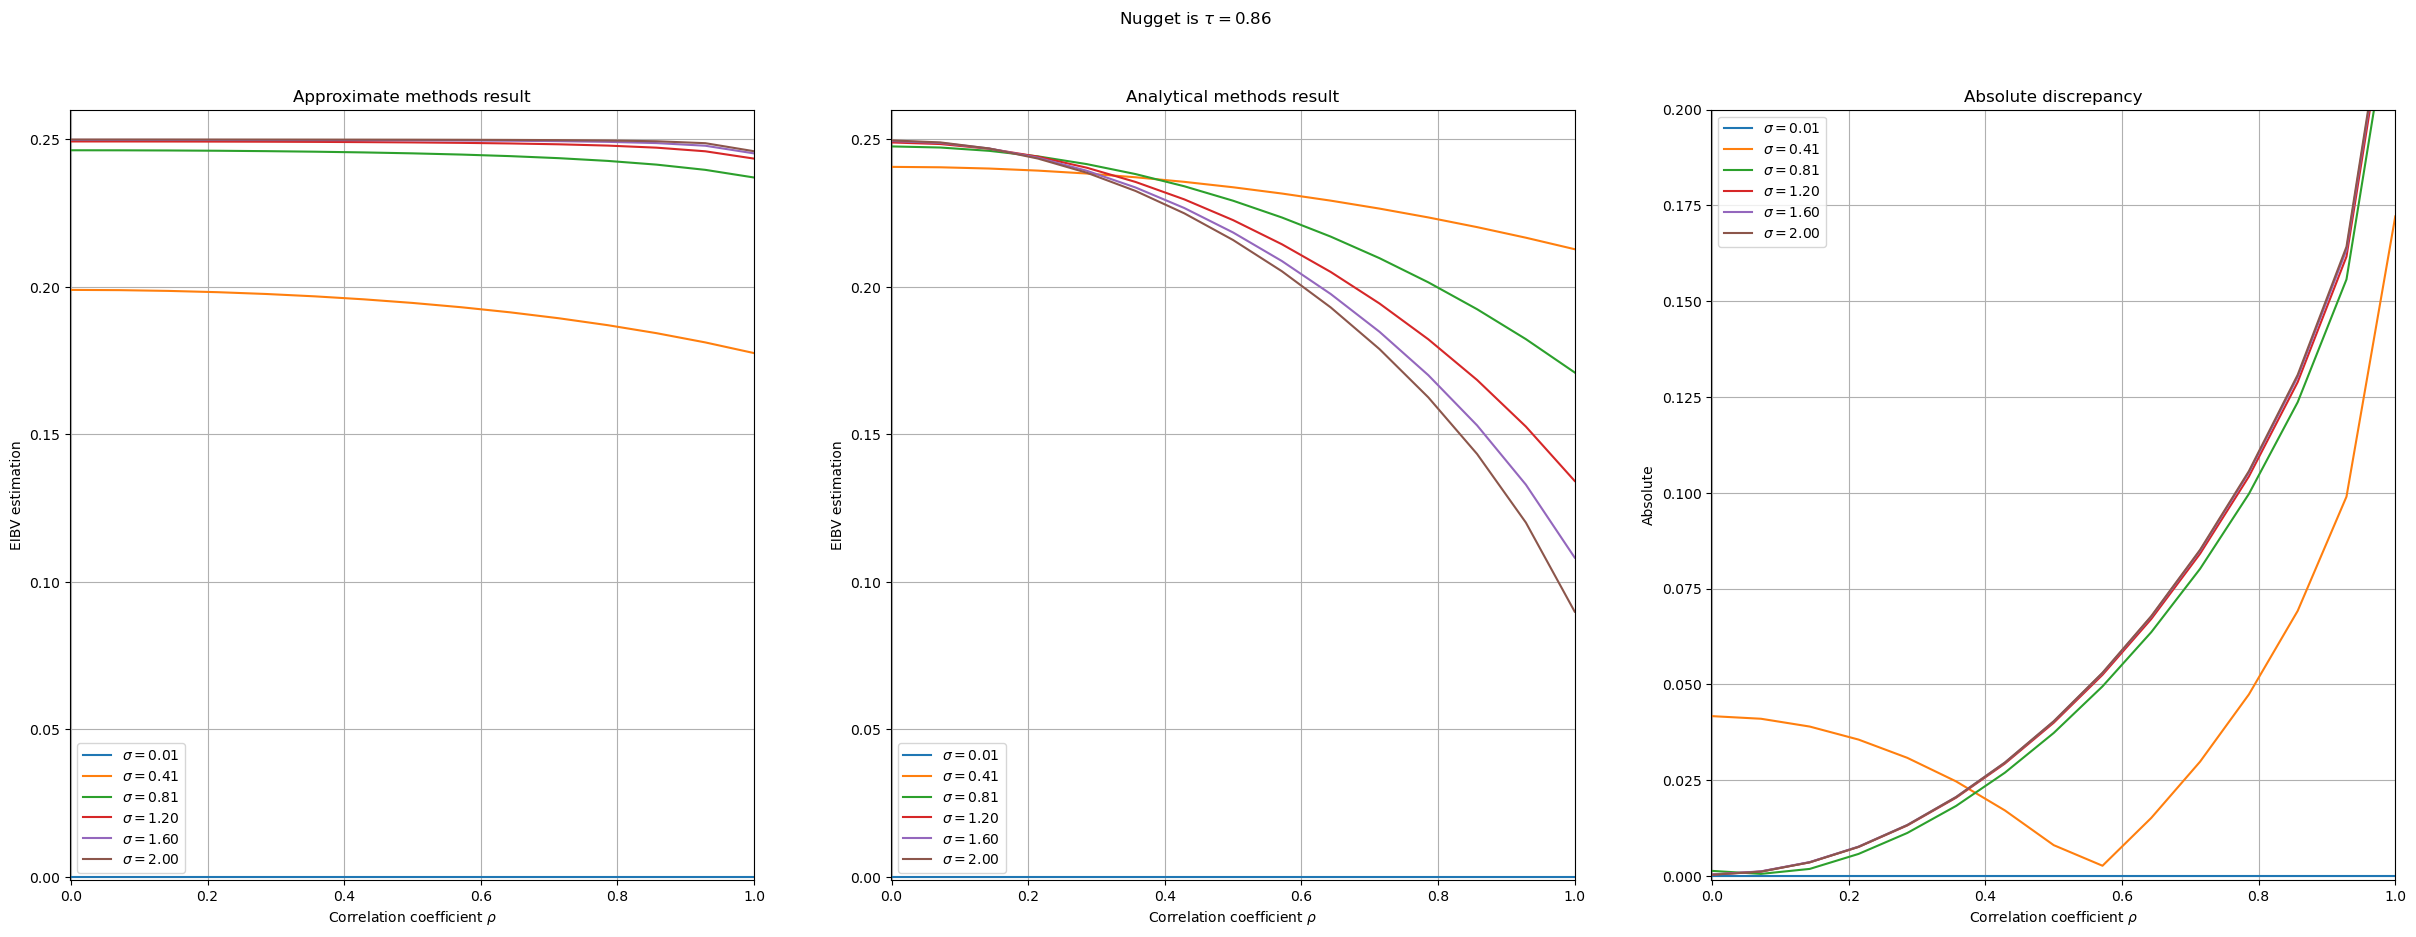

Success!


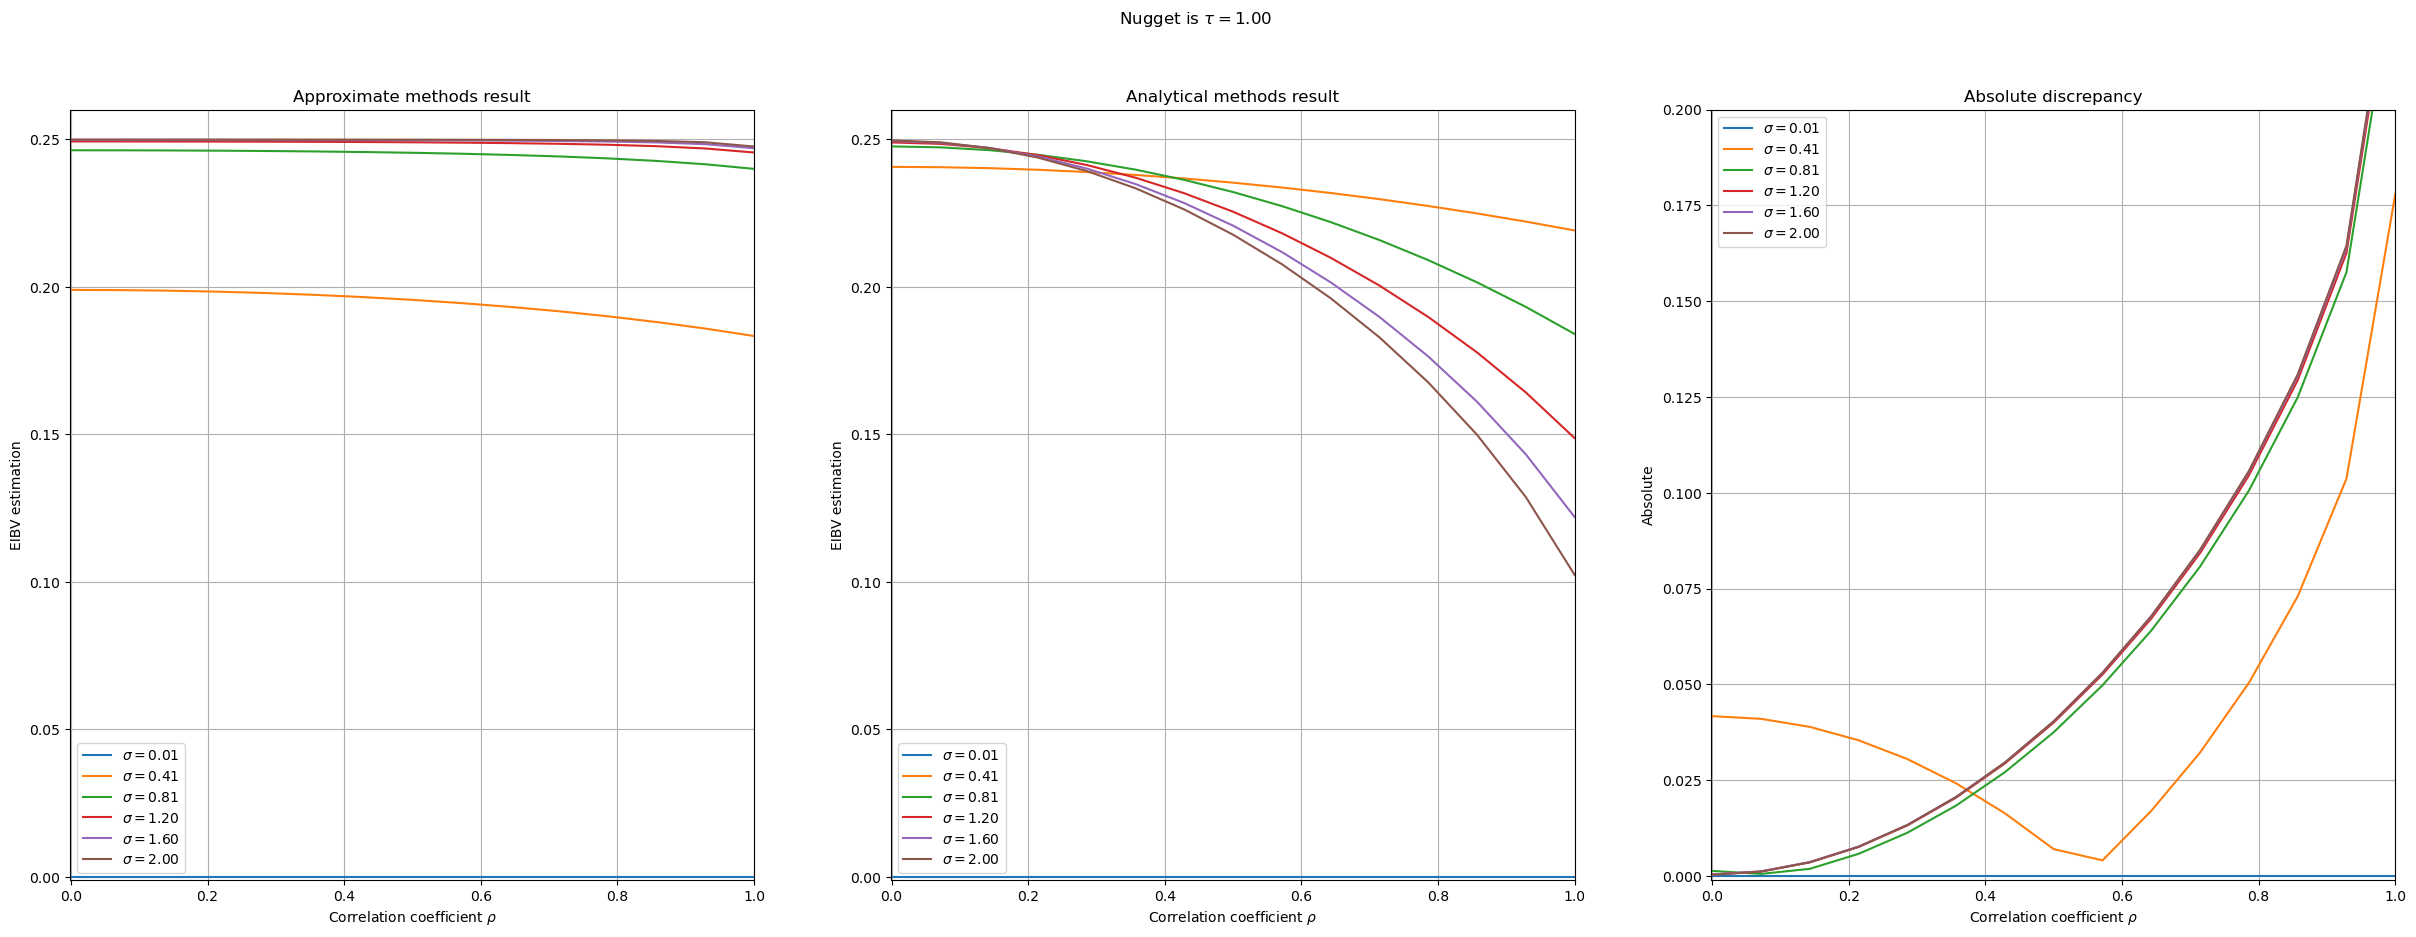

Success!


In [5]:
def plotf(i_nugget: int = 0):
    fig = plt.figure(figsize=(30, 10))
    gs = GridSpec(nrows=1, ncols=3)
    ax = fig.add_subplot(gs[0])
    [plt.plot(rho, eibv_appr[:, i, i_nugget], label=r"$\sigma = {:.2f}$".format(sigma[i])) for i in range(sigma.shape[0])]
    plt.xlabel(r"Correlation coefficient $\rho$")
    plt.ylabel("EIBV estimation")
    plt.title("Approximate methods result")
    plt.legend(loc="lower left")
    plt.grid()
    plt.xlim([-.001, 1])
    plt.ylim([-.001, .26])

    ax = fig.add_subplot(gs[1])
    [plt.plot(rho, eibv_analy[:, i, i_nugget], label=r"$\sigma = {:.2f}$".format(sigma[i])) for i in range(sigma.shape[0])]
    # [plt.plot(rho, eibv_analy[:, i, 1], label=r"Analytical $\Phi_2 $") for i in range(sigma.shape[0])]
    plt.xlabel(r"Correlation coefficient $\rho$")
    plt.ylabel("EIBV estimation")
    plt.title("Analytical methods result")
    plt.legend(loc="lower left")
    plt.grid()
    plt.xlim([-.001, 1])
    plt.ylim([-.001, .26])

    ax = fig.add_subplot(gs[2])
    [plt.plot(rho, np.abs(eibv_appr[:, i, i_nugget] - eibv_analy[:, i, 0]),
              label=r"$\sigma = {:.2f}$".format(sigma[i])) for i in range(sigma.shape[0])]
    plt.xlabel(r"Correlation coefficient $\rho$")
    plt.ylabel("Absolute")
    plt.title("Absolute discrepancy")
    plt.legend(loc="upper left")
    plt.grid()
    plt.xlim([-.001, 1])
    plt.ylim([-.001, .2])

    plt.suptitle(r"Nugget is $\tau = {:.2f}$".format(tau[i_nugget]))
    plt.show()
    print("Success!")
#     plt.savefig(filepath + "P_nugget_{:.2f}.jpg".format(tau[i_nugget]))
#     plt.close("all")

for i in range(len(tau)):
    plotf(i)